# **STAGE 3**

## **1. Research Model**

In [ ]:
df_results = pd.DataFrame(columns = ['Method', 'Precision', 'Recall', 'AUC'])

In [ ]:
df_results

In [ ]:
df_results.sort_values('AUC', ascending = False)

,Method,Precision,Recall,AUC
6,XGB,0.736174,0.935070,0.856998
4,Random Forest,0.734593,0.936575,0.855640
5,ANN,0.723544,0.953317,0.848790
0,Logistic Regression,0.707937,0.969439,0.841565
3,Decision Tree,0.735635,0.906103,0.838452
1,KNN,0.725487,0.890070,0.829802
2,Naive Bayes,0.725487,0.890070,0.829802


In [ ]:
df_results.sort_values('Precision', ascending = False)

,Method,Precision,Recall,AUC
6,XGB,0.736174,0.935070,0.856998
3,Decision Tree,0.735635,0.906103,0.838452
4,Random Forest,0.734593,0.936575,0.855640
1,KNN,0.725487,0.890070,0.829802
2,Naive Bayes,0.725487,0.890070,0.829802
5,ANN,0.723544,0.953317,0.848790
0,Logistic Regression,0.707937,0.969439,0.841565


In [ ]:
df_results.sort_values('Recall', ascending = False)

,Method,Precision,Recall,AUC
0,Logistic Regression,0.707937,0.969439,0.841565
5,ANN,0.723544,0.953317,0.848790
4,Random Forest,0.734593,0.936575,0.855640
6,XGB,0.736174,0.935070,0.856998
3,Decision Tree,0.735635,0.906103,0.838452
1,KNN,0.725487,0.890070,0.829802
2,Naive Bayes,0.725487,0.890070,0.829802


###Logistic

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Hyperparameters
penalty = ['l2']
C = [0.2,0.22,0.24, 0.26, 0.28, 0.3, 0.32, 0.36]

# Dict
hyperparameters = dict(penalty=penalty, C=C)

classifier = LogisticRegression(random_state = 42)

clf = RandomizedSearchCV(classifier, hyperparameters, cv = 5, random_state=42, scoring='', verbose = 1, n_jobs=-1)
best_model = clf.fit(X_train, y_train)

print(best_model.best_estimator_)

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    8.2s finished


LogisticRegression(C=0.2, random_state=42)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score
print('\nConfusion matrix')
print(confusion_matrix(y_test, best_model.predict(X_test)))

from sklearn.metrics import accuracy_score
print('\nPrecision')
print(precision_score(y_test, best_model.predict(X_test)))

print('\nRecall')
print(recall_score(y_test, best_model.predict(X_test)))

from sklearn.metrics import classification_report
print('\nClassification report')
print(classification_report(y_test, best_model.predict(X_test))) # generate the precision, recall, f-1 score, num


Confusion matrix
[[ 6774  4515]
 [  345 10944]]

Precision
0.7079371240054337

Recall
0.9694392771724688

Classification report
              precision    recall  f1-score   support

           0       0.95      0.60      0.74     11289
           1       0.71      0.97      0.82     11289

    accuracy                           0.78     22578
   macro avg       0.83      0.78      0.78     22578
weighted avg       0.83      0.78      0.78     22578



In [ ]:
df_results = df_results.append({ 'Method' : 'Logistic Regression',
                               'Precision' : precision_score(y_test, best_model.predict(X_test)),
                               'Recall' : recall_score(y_test, best_model.predict(X_test)),
                               'AUC' : roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])
                            }, ignore_index = True)

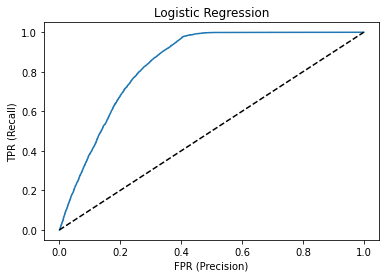

Area under curve (AUC):  0.8415650775228899
0.8415650775228899


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])

plt.title('Logistic Regression')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))
print (roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))

In [ ]:
import pickle
filename = 'logistic.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [ ]:
filename = 'logistic.sav'
best_model = pickle.load(open(filename, 'rb'))
best_model.best_estimator_

LogisticRegression(C=0.2, random_state=42)

###KNN

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import uniform

# Hyperparameters
n_neighbors = [3, 5, 7, 9, 11, 13]
metric = ['euclidean', 'manhattan', 'minkowski']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

# Dict
hyperparameters = dict(n_neighbors=n_neighbors, metric=metric, algorithm = algorithm)

classifier = KNeighborsClassifier()

clf = RandomizedSearchCV(classifier, hyperparameters, cv = 5, random_state=42, scoring='roc_auc', verbose = 1, n_jobs = -1)
best_model = clf.fit(X_train, y_train)

print(best_model.best_estimator_)

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.0min finished


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=11)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score
print('\nConfusion matrix')
print(confusion_matrix(y_test, best_model.predict(X_test)))

from sklearn.metrics import accuracy_score
print('\nPrecision')
print(precision_score(y_test, best_model.predict(X_test)))

print('\nRecall')
print(recall_score(y_test, best_model.predict(X_test)))

from sklearn.metrics import classification_report
print('\nClassification report')
print(classification_report(y_test, best_model.predict(X_test))) # generate the precision, recall, f-1 score, num


Confusion matrix
[[ 7487  3802]
 [ 1241 10048]]

Precision
0.7254873646209387

Recall
0.8900699796261847

Classification report
              precision    recall  f1-score   support

           0       0.86      0.66      0.75     11289
           1       0.73      0.89      0.80     11289

    accuracy                           0.78     22578
   macro avg       0.79      0.78      0.77     22578
weighted avg       0.79      0.78      0.77     22578



In [ ]:
df_results = df_results.append({ 'Method' : 'KNN',
                               'Precision' : precision_score(y_test, best_model.predict(X_test)),
                               'Recall' : recall_score(y_test, best_model.predict(X_test)),
                               'AUC' : roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])
                            }, ignore_index = True)

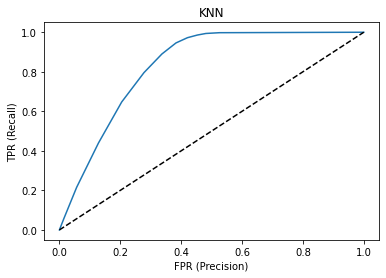

Area under curve (AUC):  0.829802058781141
0.829802058781141


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])

plt.title('KNN')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))
print (roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))

In [ ]:
import pickle
filename = 'knn.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [ ]:
filename = 'knn.sav'
best_model = pickle.load(open(filename, 'rb'))
best_model.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=11)

###Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score
print('\nConfusion matrix')
print(confusion_matrix(y_test, best_model.predict(X_test)))

from sklearn.metrics import accuracy_score
print('\nPrecision')
print(precision_score(y_test, best_model.predict(X_test)))

print('\nRecall')
print(recall_score(y_test, best_model.predict(X_test)))

from sklearn.metrics import classification_report
print('\nClassification report')
print(classification_report(y_test, best_model.predict(X_test))) # generate the precision, recall, f-1 score, num


Confusion matrix
[[ 7496  3793]
 [ 1088 10201]]

Precision
0.7289552665428041

Recall
0.9036229958366552

Classification report
              precision    recall  f1-score   support

           0       0.87      0.66      0.75     11289
           1       0.73      0.90      0.81     11289

    accuracy                           0.78     22578
   macro avg       0.80      0.78      0.78     22578
weighted avg       0.80      0.78      0.78     22578



In [ ]:
df_results = df_results.append({ 'Method' : 'Naive Bayes',
                               'Precision' : precision_score(y_test, best_model.predict(X_test)),
                               'Recall' : recall_score(y_test, best_model.predict(X_test)),
                               'AUC' : roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])
                            }, ignore_index = True)

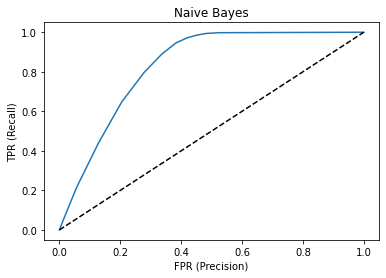

Area under curve (AUC):  0.829802058781141
0.829802058781141


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])

plt.title('Naive Bayes')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))
print (roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))

In [ ]:
import pickle
filename = 'naiveb.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
filename = 'naiveb.sav'
best_model = pickle.load(open(filename, 'rb'))
print("Done")
best_model.best_estimator_

Done


AttributeError: 'GaussianNB' object has no attribute 'best_estimator_'

###Decision Tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

#Hyper Parameter

max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion= ['gini', 'entropy']
# Dict
hyperparameters = {
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               'criterion' : criterion
                }

classifier = DecisionTreeClassifier(random_state = 42)

clf = RandomizedSearchCV(classifier, hyperparameters, cv = 5, random_state=42, n_iter = 15, scoring='roc_auc', verbose = 1, n_jobs = -1)
best_model = clf.fit(X_train, y_train)

print(best_model.best_estimator_)

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    4.3s finished


DecisionTreeClassifier(max_depth=83, max_features='sqrt', min_samples_leaf=10,
                       min_samples_split=100, random_state=42)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score
print('\nConfusion matrix')
print(confusion_matrix(y_test, best_model.predict(X_test)))

from sklearn.metrics import accuracy_score
print('\nPrecision')
print(precision_score(y_test, best_model.predict(X_test)))

print('\nRecall')
print(recall_score(y_test, best_model.predict(X_test)))

from sklearn.metrics import classification_report
print('\nClassification report')
print(classification_report(y_test, best_model.predict(X_test))) # generate the precision, recall, f-1 score, num


Confusion matrix
[[ 7613  3676]
 [ 1060 10229]]

Precision
0.7356346637900036

Recall
0.9061032863849765

Classification report
              precision    recall  f1-score   support

           0       0.88      0.67      0.76     11289
           1       0.74      0.91      0.81     11289

    accuracy                           0.79     22578
   macro avg       0.81      0.79      0.79     22578
weighted avg       0.81      0.79      0.79     22578



In [ ]:
df_results = df_results.append({ 'Method' : 'Decision Tree',
                               'Precision' : precision_score(y_test, best_model.predict(X_test)),
                               'Recall' : recall_score(y_test, best_model.predict(X_test)),
                               'AUC' : roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])
                            }, ignore_index = True)

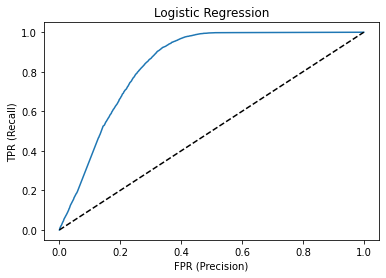

Area under curve (AUC):  0.8384523596512945
0.8384523596512945


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])

plt.title('Logistic Regression')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))
print (roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))

Text(0.5, 1.0, 'feature importance score')

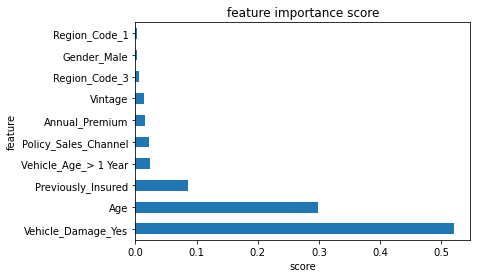

In [ ]:
importance = best_model.best_estimator_.feature_importances_
feat_importances = pd.Series(importance, index= pd.Series(df.drop('Response', axis = 1).columns))
# feat_importances.plot(kind ="barh")
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [ ]:
import pickle
filename = 'dectree.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [ ]:
filename = 'dectree.sav'
best_model = pickle.load(open(filename, 'rb'))
best_model.best_estimator_

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomizedSearchCV from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=53, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

### Random forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

#Hyper Parameter

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # Number of trees in random forest
max_features = ['auto', 'sqrt', 'log2'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)] # Maximum number of levels in tree
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)] # Minimum number of samples required to split a node
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)] # Minimum number of samples required at each leaf node
bootstrap = [True, False] # Method of selecting samples for training each tree
n_jobs = [-1]

#Menjadikan ke dalam bentuk dictionary
random_search = {'criterion': ['entropy','gini'],
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_split,
               'min_samples_split': min_samples_leaf,
               'n_estimators': n_estimators,
                'max_features' : max_features}

# random_search = {'criterion': ['entropy','gini'],
#                'max_depth': [10],
#                'min_samples_leaf': [6],
#                'min_samples_split': [7],
#                'n_estimators': [300]}

classifier = RandomForestClassifier(random_state = 42)

clf = RandomizedSearchCV(classifier, random_search, cv = 5, random_state=42, scoring='roc_auc', verbose = 4, n_jobs = -1)
best_model = clf.fit(X_train, y_train)

print(best_model.best_estimator_)

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 14.6min finished


RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=8, min_samples_split=7,
                       random_state=42)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
print('\nConfusion matrix')
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('\nAccuracy')
print(accuracy_score(y_test, y_pred))

print('\nF1_Score')
print(f1_score(y_test, best_model.predict(X_test)))

from sklearn.metrics import classification_report
print('\nClassification report')
print(classification_report(y_test, y_pred)) # generate the precision, recall, f-1 score, num


Confusion matrix
[[ 7496  3793]
 [ 1088 10201]]

Accuracy
0.783816104172203

F1_Score
0.8233782415699712

Classification report
              precision    recall  f1-score   support

           0       0.87      0.66      0.75     11289
           1       0.73      0.90      0.81     11289

    accuracy                           0.78     22578
   macro avg       0.80      0.78      0.78     22578
weighted avg       0.80      0.78      0.78     22578



In [ ]:
df_results = df_results.append({ 'Method' : 'Random Forest',
                               'Precision' : precision_score(y_test, best_model.predict(X_test)),
                               'Recall' : recall_score(y_test, best_model.predict(X_test)),
                               'AUC' : roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])
                            }, ignore_index = True)

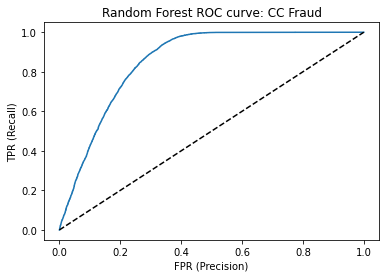

Area under curve (AUC):  0.8556403568033373


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])

plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.8556403568033373

In [ ]:
import pickle
filename = 'rforest1.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [ ]:
filename = 'rforest1.sav'
best_model = pickle.load(open(filename, 'rb'))
best_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=8, min_samples_split=7,
                       random_state=42)

Text(0.5, 1.0, 'feature importance score')

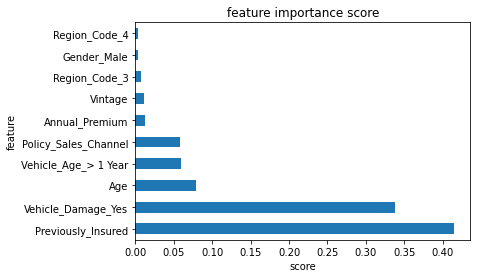

In [ ]:
importance = best_model.best_estimator_.feature_importances_
feat_importances = pd.Series(importance, index= pd.Series(df.drop('Response', axis = 1).columns))
# feat_importances.plot(kind ="barh")
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

### Artificial Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from keras.metrics import AUC
from sklearn.model_selection import cross_val_score

In [ ]:
def create_baseline():
    model = Sequential()
    model.add(Dense(15, input_dim = 15, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=[AUC()])
    return model

In [ ]:
cvscores = []
kfold = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)
for train, test in kfold.split(X_train,y_train):
    model = create_baseline()
    history = model.fit(X_train, y_train, epochs = 3, batch_size = 32, verbose = 1, validation_data =(X_test,y_test))
    scores = model.evaluate(X_test, y_test, verbose = 1)
    print("\n %s: %.2f%%\n---------\n" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("AUC Result for Testing")
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
# kfold = StratifiedKFold(n_splits = 3, shuffle = True)
# results = cross_val_score(model,  X, y, cv = kfold, scoring = 'roc_auc')
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/3
2117/2117 [==============================] - 5s 2ms/step - loss: 0.5156 - auc: 0.7924 - val_loss: 0.4311 - val_auc: 0.8460
Epoch 2/3
2117/2117 [==============================] - 3s 1ms/step - loss: 0.4349 - auc: 0.8403 - val_loss: 0.4294 - val_auc: 0.8476
Epoch 3/3
706/706 [==============================] - 1s 1ms/step - loss: 0.4274 - auc: 0.8488

 auc: 84.88%
---------

Epoch 1/3
2117/2117 [==============================] - 4s 2ms/step - loss: 0.4926 - auc_1: 0.8144 - val_loss: 0.4309 - val_auc_1: 0.8454
Epoch 2/3
2117/2117 [==============================] - 4s 2ms/step - loss: 0.4321 - auc_1: 0.8428 - val_loss: 0.4290 - val_auc_1: 0.8466
Epoch 3/3
706/706 [==============================] - 1s 1ms/step - loss: 0.4278 - auc_1: 0.8481

 auc_1: 84.81%
---------

Epoch 1/3
2117/2117 [==============================] - 4s 2ms/step - loss: 0.4937 - auc_2: 0.8141 - val_loss: 0.4298 - val_auc_2: 0.8455
Epoch 2/3
2117/2117 [==============================] - 3s 2ms/step - loss: 0.4308

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 16        
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = model.predict(X_test, batch_size = 32)
y_pred = np.where(y_pred >= 0.5, 1, 0)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score
print('\nConfusion matrix')
print(confusion_matrix(y_test, best_model.predict(X_test)))

from sklearn.metrics import accuracy_score
print('\nPrecision')
print(precision_score(y_test, best_model.predict(X_test)))

print('\nRecall')
print(recall_score(y_test, best_model.predict(X_test)))

from sklearn.metrics import classification_report
print('\nClassification report')
print(classification_report(y_test, best_model.predict(X_test))) # generate the precision, recall, f-1 score, num


Confusion matrix
[[ 7469  3820]
 [  716 10573]]

Precision
0.7345932050302231

Recall
0.9365754274072106

Classification report
              precision    recall  f1-score   support

           0       0.91      0.66      0.77     11289
           1       0.73      0.94      0.82     11289

    accuracy                           0.80     22578
   macro avg       0.82      0.80      0.80     22578
weighted avg       0.82      0.80      0.80     22578



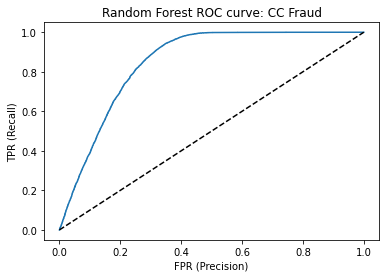

Area under curve (AUC):  0.8494722650085131


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, model.predict(X_test, batch_size = 32)[:,0])

plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
import h5py

#Serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
#Serialize weights to HDF5
model.save_weights("ANN.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
df_results = df_results.append({ 'Method' : 'ANN',
                               'Precision' : precision_score(y_test, y_pred),
                               'Recall' : recall_score(y_test, y_pred),
                               'AUC' : np.mean(cvscores)/100
                            }, ignore_index = True)

### XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

#Hyper Paramete
hyperparameters = {
                    "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
                    "max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15],
                    "min_child_weight": [ 1, 3, 5, 7 ],
                    "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                    "colsample_bytree": [ 0.3, 0.4, 0.5 , 0.7 ],
                    "eta":[.3, .2, .1, .05, .01, .005]
                  }

classifier = xgb.XGBClassifier(random_state = 42)

clf = RandomizedSearchCV(classifier, hyperparameters, cv = 5, random_state=42, scoring='roc_auc', verbose = 4, n_jobs = -1)
best_model = clf.fit(X_train, y_train)

print(best_model.best_estimator_)

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score
print('\nConfusion matrix')
print(confusion_matrix(y_test, best_model.predict(X_test)))

from sklearn.metrics import accuracy_score
print('\nPrecision')
print(precision_score(y_test, best_model.predict(X_test)))

print('\nRecall')
print(recall_score(y_test, best_model.predict(X_test)))

from sklearn.metrics import classification_report
print('\nClassification report')
print(classification_report(y_test, best_model.predict(X_test))) # generate the precision, recall, f-1 score, num


Confusion matrix
[[ 7506  3783]
 [  733 10556]]

Precision
0.7361740707162284

Recall
0.9350695367171583

Classification report
              precision    recall  f1-score   support

           0       0.91      0.66      0.77     11289
           1       0.74      0.94      0.82     11289

    accuracy                           0.80     22578
   macro avg       0.82      0.80      0.80     22578
weighted avg       0.82      0.80      0.80     22578



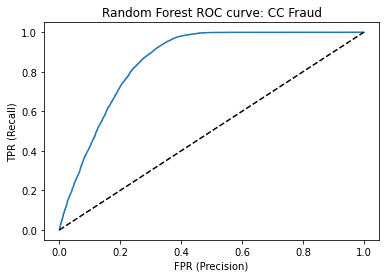

Area under curve (AUC):  0.8569978029373959


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])

plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
df_results = df_results.append({ 'Method' : 'XGB',
                               'Precision' : precision_score(y_test, best_model.predict(X_test)),
                               'Recall' : recall_score(y_test, best_model.predict(X_test)),
                               'AUC' : roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])
                            }, ignore_index = True)

In [ ]:
importance = best_model.best_estimator_.feature_importances_
feat_importances = pd.Series(importance, index= pd.Series(df.drop('Response', axis = 1).columns))
# feat_importances.plot(kind ="barh")
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [ ]:
import pickle
filename = 'xgb.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [ ]:
import pickle
import xgboost as xgb

filename = 'xgb.sav'
best_model = pickle.load(open(filename, 'rb'))
best_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.005, gamma=0.0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [ ]:
pip install xgboost --upgrade

     |████████████████████████████████| 157.5MB 90kB/s 
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


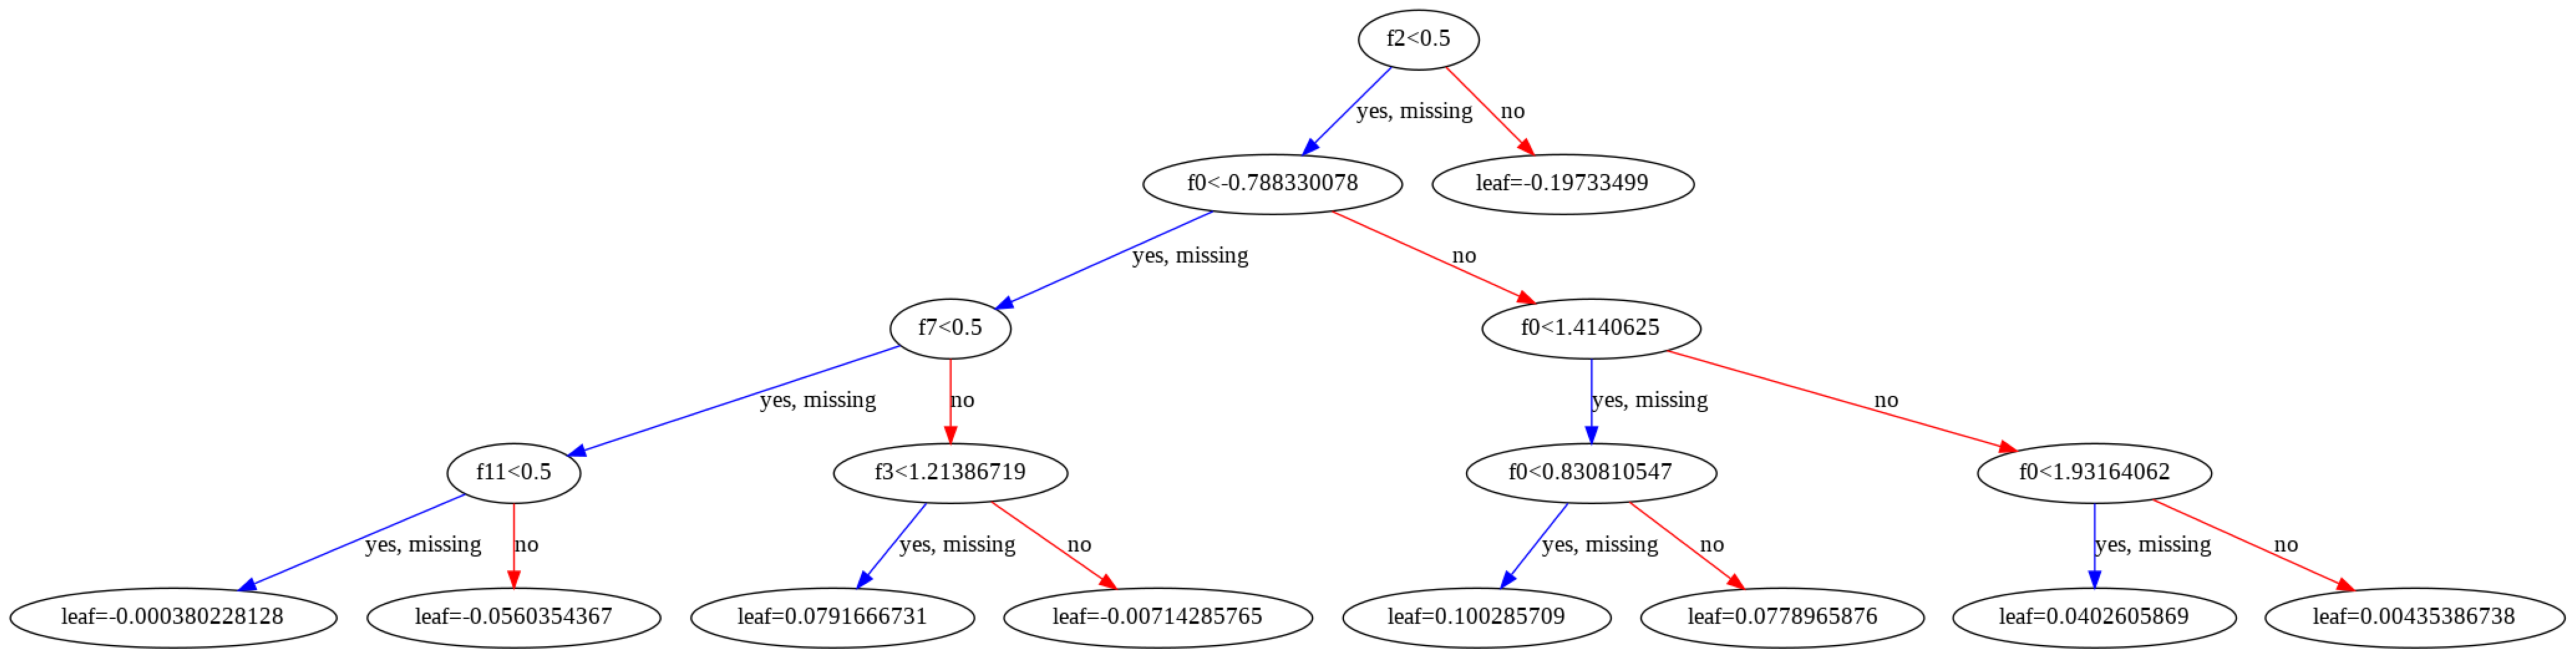

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(80,80))
plot_tree(best_model.best_estimator_, ax = ax, num_trees = 0 )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90310 entries, 0 to 90309
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   90310 non-null  float16
 1   Driving_License       90310 non-null  int8   
 2   Previously_Insured    90310 non-null  int8   
 3   Annual_Premium        90310 non-null  float16
 4   Policy_Sales_Channel  90310 non-null  float16
 5   Vintage               90310 non-null  float16
 6   Gender_Male           90310 non-null  int8   
 7   Vehicle_Age_> 1 Year  90310 non-null  int8   
 8   Vehicle_Damage_Yes    90310 non-null  int8   
 9   Region_Code_1         90310 non-null  int8   
 10  Region_Code_2         90310 non-null  int8   
 11  Region_Code_3         90310 non-null  int8   
 12  Region_Code_4         90310 non-null  int8   
 13  Region_Code_5         90310 non-null  int8   
 14  Region_Code_6         90310 non-null  int8   
 15  Response           

### Ada Boost


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier

#Hyper Paramete
hyperparameters = {
                   'n_estimators': [10, 50, 100, 500, 1000, 5000],
                   'learning_rate':np.arange(0.1, 2.1, 0.1)
                  }

classifier = AdaBoostClassifier(random_state=42)

clf = RandomizedSearchCV(classifier, hyperparameters, cv = 5, random_state=42, scoring='roc_auc', verbose = 4, n_jobs = -1)
best_model = clf.fit(X_train, y_train)

print(best_model.best_estimator_)

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 25.3min finished


AdaBoostClassifier(learning_rate=0.1, n_estimators=1000, random_state=42)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score
print('\nConfusion matrix')
print(confusion_matrix(y_test, best_model.predict(X_test)))

from sklearn.metrics import accuracy_score
print('\nPrecision')
print(precision_score(y_test, best_model.predict(X_test)))

print('\nRecall')
print(recall_score(y_test, best_model.predict(X_test)))

from sklearn.metrics import classification_report
print('\nClassification report')
print(classification_report(y_test, best_model.predict(X_test))) # generate the precision, recall, f-1 score, num


Confusion matrix
[[ 7478  3811]
 [  782 10507]]

Precision
0.7338315407179774

Recall
0.9307290282575958

Classification report
              precision    recall  f1-score   support

           0       0.91      0.66      0.77     11289
           1       0.73      0.93      0.82     11289

    accuracy                           0.80     22578
   macro avg       0.82      0.80      0.79     22578
weighted avg       0.82      0.80      0.79     22578



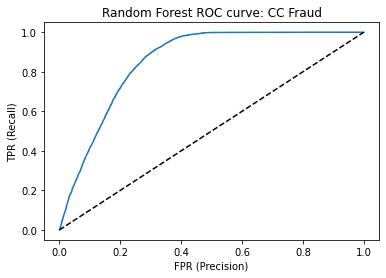

Area under curve (AUC):  0.854421268245849


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])

plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

Text(0.5, 1.0, 'feature importance score')

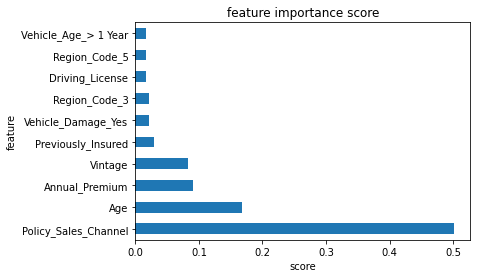

In [ ]:
importance = best_model.best_estimator_.feature_importances_
feat_importances = pd.Series(importance, index= pd.Series(df.drop('Response', axis = 1).columns))
# feat_importances.plot(kind ="barh")
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [ ]:
df_results = df_results.append({ 'Method' : 'AdaBoost',
                               'Precision' : precision_score(y_test, best_model.predict(X_test)),
                               'Recall' : recall_score(y_test, best_model.predict(X_test)),
                               'AUC' : roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])
                            }, ignore_index = True)

In [ ]:
import pickle
filename = 'ada.sav'
pickle.dump(best_model, open(filename, 'wb'))

## 2. Selected Model Validation

In [ ]:
train = pd.read_csv('data-stage1-31012021.csv')
# split independent variabel dan dependent variabel
X = train.drop('Response', axis = 1).values
y = train['Response'].values
# split test dan train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y, shuffle = True)

In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
roc_auc_list = []
roc_auc_holdout = []
roc_auc_train = []
folds = []

# Sudah di tuning
# model = xgb.XGBClassifier(colsample_bytree=0.7, eta=0.2, gamma=0.4,
#                           learning_rate=0.05, max_depth=8,
#                           min_child_weight=5,
#                           n_estimators=100, n_jobs=-1)
model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.005, gamma=0.0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)
# model = xgb.XGBClassifier()
kfold = StratifiedKFold(n_splits= 10, random_state = 42,shuffle =True)
for i,(train_index, test_index) in enumerate(kfold.split(X_train, y_train)):
    X1_train, X1_valid = X[train_index], X[test_index]
    y1_train, y1_valid = y[train_index], y[test_index]
    model.fit(X1_train, y1_train)
    train_pred = model.predict_proba(X1_train)[:,1] # 70%
    #Measure of the fit of your model.
    pred = model.predict_proba(X1_valid)[:,1] # 10%
    # DATA WHICH MODEL HAS NOT SEEN
    pred_holdout = model.predict_proba(X_test)[:,1] # 20%
    
    print('Prediction length on validation set, XGBoost Classifier, fold ', i, ': ', len(pred))

    folds.append(i)
    roc_auc_list.append(roc_auc_score(y1_valid, pred))
    roc_auc_holdout.append(roc_auc_score(y_test, pred_holdout))
    roc_auc_train.append(roc_auc_score(y1_train, train_pred))

[12:28:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Prediction length on validation set, XGBoost Classifier, fold  0 :  6774
[12:28:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Prediction length on validation set, XGBoost Classifier, fold  1 :  6774
[12:28:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Prediction length on validation set, XGBoost Classifier, fold  2 :  6773
[12:28:29] WARNING: ../sr

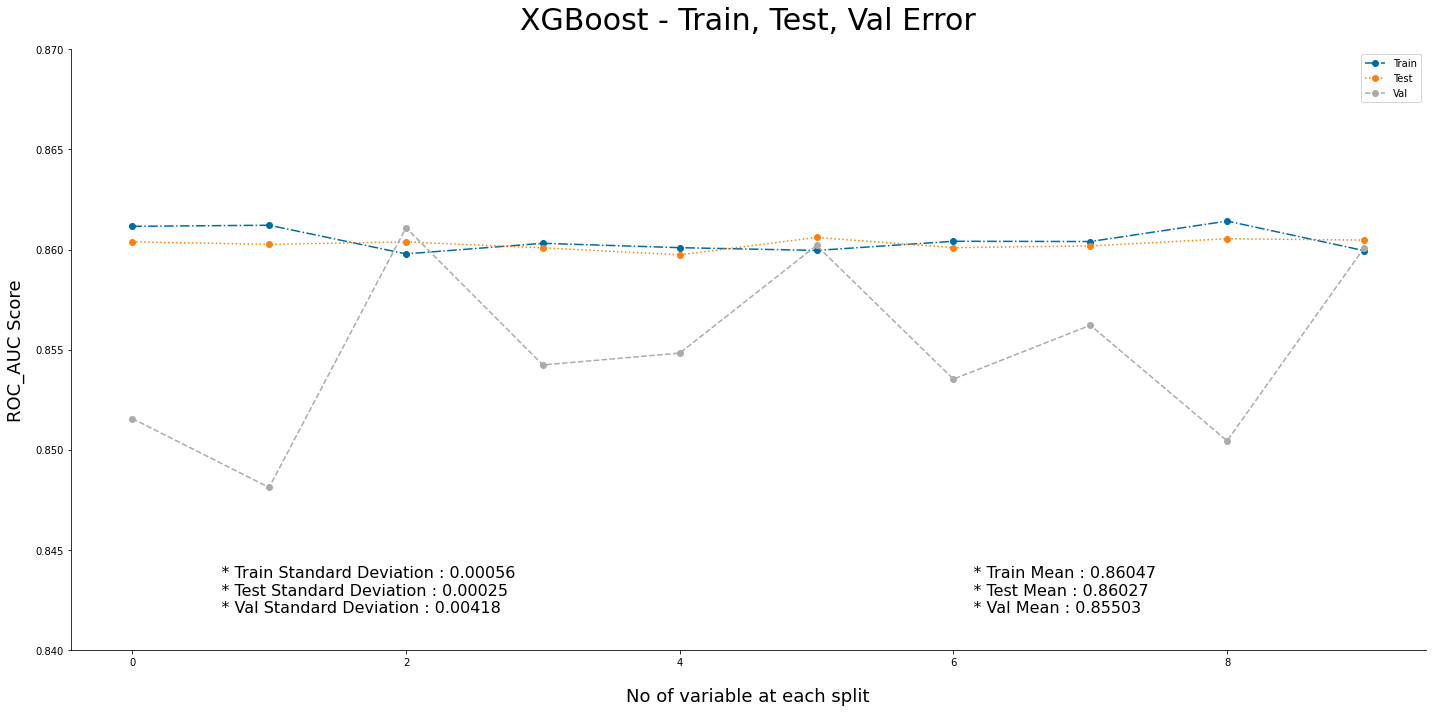

In [ ]:
rg = np.arange(0.840,0.870,0.005)

train_mean = np.mean(roc_auc_train)
test_mean = np.mean(roc_auc_holdout)
val_mean = np.mean(roc_auc_list)

train_std = np.std(roc_auc_train)
test_std = np.std(roc_auc_holdout)
val_std = np.std(roc_auc_list)

plt.style.use('tableau-colorblind10')

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(roc_auc_train, label='Train', marker='o', linestyle='-.')
ax.plot(roc_auc_holdout, label='Test', marker='o', linestyle=':')
ax.plot(roc_auc_list, label='Val', marker='o', linestyle='--')

text_m = '''
    * Train Mean : ''' + str(format(train_mean, '.5f')) + '''
    * Test Mean : ''' + str(format(test_mean, '.5f')) + ''' 
    * Val Mean : ''' + str(format(val_mean, '.5f')) + '''     
'''

ax.text(6,0.841,text_m,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')


text_s = '''
    * Train Standard Deviation : ''' + str(format(train_std, '.5f')) + '''
    * Test Standard Deviation : ''' + str(format(test_std, '.5f')) + ''' 
    * Val Standard Deviation : ''' + str(format(val_std, '.5f')) + '''     
'''

ax.text(0.5,0.841,text_s,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')


ax.set_xlabel('No of variable at each split', fontsize=18, labelpad=20)
ax.set_ylabel('ROC_AUC Score', fontsize=18, labelpad=10)

ax.set_title('XGBoost - Train, Test, Val Error', pad=20, fontsize=30)

ax.legend()
ax.set_yticks(rg)

sns.despine()

plt.savefig('./xgb-ttv.jpg')

plt.tight_layout()

plt.show();